<a href="https://colab.research.google.com/github/Freddy-De-La-Rosa/Proyecto-Ciencia-de-Datos/blob/main/Proyecto_Final_Freddy_De_La_Rosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Curso Formación Docente, Ciencia de Datos***

**Profesor:** Kevin Sossa

**Nombre:** Freddy De La Rosa Carmona

# ***Proyecto:*** *Rutas hacia la Excelencia Académica: Análisis de Resultados Saber 11 en Mahates*

# **Introducción del proyecto**
El presente proyecto tiene como objetivo analizar el desempeño académico de las instituciones educativas del municipio de Mahates en las Pruebas Saber 11 durante los últimos cuatro años. A través del análisis de datos de rendimiento, se busca identificar patrones, diferencias y factores que influyen en los resultados obtenidos. Este estudio será de gran utilidad para tomar decisiones pedagógicas y administrativas que contribuyan a mejorar la calidad educativa en el municipio.

# ***Preguntas de investigación:***

*Identificación de mejoras por asignatura:*

*   ¿Cuál es la asignatura en la que se ha presentado una mejoría en los últimos cuatro años en la Institución Educativa Camilo Torres de Mahates?

*Comparación entre colegios:*

*   ¿En qué asignatura se destacan más los resultados de la institución Camilo Torres en comparación con el colegio Lazaro de la cabecera municipal?

*Influencia geográfica en los resultados:*


*   ¿Cómo afecta la ubicación geográfica de los colegios en el municipio de Mahates a los resultados de las Pruebas Saber 11?

El análisis se fundamentará en datos proporcionados de los resultados de las pruebas, desglosados por asignatura, promedio general, y características geográficas de las instituciones. Estos resultados permitirán entender las fortalezas y áreas de oportunidad en cada colegio, así como desarrollar estrategias que respondan a las necesidades particulares de cada contexto educativo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
ruta = "/content/drive/MyDrive/Colab Notebooks/Datos actualizados.csv"
df_sucios = pd.read_csv(ruta, encoding='latin1', sep=';')
df_sucios.head()

,Camilo Torres,Camilo Torres - Lectura Critica,Camilo Torres - Matematicas,Camilo Torres - Ciencias Naturales,Camilo Torres - Ingles,Camilo Torres - Sociales y Ciudadanas,Lazaro,Lazaro - Lectura Critica,Lazaro - Matematicas,Lazaro - Ciencias Naturales,Lazaro - Ingles,Lazaro - Sociales y Ciudadanas
0,2020,46,45,40,38,39,2020,43,39,38,40,38
1,2021,45,42,42,38,38,2021,43,39,39,39,37
2,2022,44,42,41,39,37,2022,43,39,40,40,37
3,2023,48,45,43,43,41,2023,45,42,42,41,39


In [ ]:
df_sucios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Camilo Torres                          4 non-null      int64
 1   Camilo Torres - Lectura Critica        4 non-null      int64
 2   Camilo Torres - Matematicas            4 non-null      int64
 3   Camilo Torres - Ciencias Naturales     4 non-null      int64
 4   Camilo Torres - Ingles                 4 non-null      int64
 5   Camilo Torres - Sociales y Ciudadanas  4 non-null      int64
 6   Lazaro                                 4 non-null      int64
 7   Lazaro - Lectura Critica               4 non-null      int64
 8   Lazaro - Matematicas                   4 non-null      int64
 9   Lazaro - Ciencias Naturales            4 non-null      int64
 10  Lazaro - Ingles                        4 non-null      int64
 11  Lazaro - Sociales y Ciudadanas      

In [ ]:
df_sucios.isnull().sum()

,0
Camilo Torres,0
Camilo Torres - Lectura Critica,0
Camilo Torres - Matematicas,0
Camilo Torres - Ciencias Naturales,0
Camilo Torres - Ingles,0
Camilo Torres - Sociales y Ciudadanas,0
Lazaro,0
Lazaro - Lectura Critica,0
Lazaro - Matematicas,0
Lazaro - Ciencias Naturales,0


In [ ]:
df_sucios[df_sucios['Camilo Torres'].isnull()]
df_sucios[df_sucios['Camilo Torres - Lectura Critica'].isnull()]
df_sucios[df_sucios['Camilo Torres - Matematicas'].isnull()]
df_sucios[df_sucios['Camilo Torres - Ciencias Naturales'].isnull()]
df_sucios[df_sucios['Camilo Torres - Ingles'].isnull()]
df_sucios[df_sucios['Camilo Torres - Sociales y Ciudadanas'].isnull()]
df_sucios[df_sucios['Lazaro'].isnull()]
df_sucios[df_sucios['Lazaro - Lectura Critica'].isnull()]
df_sucios[df_sucios['Lazaro - Matematicas'].isnull()]
df_sucios[df_sucios['Lazaro - Ciencias Naturales'].isnull()]
df_sucios[df_sucios['Lazaro - Ingles'].isnull()]
df_sucios[df_sucios['Lazaro - Sociales y Ciudadanas'].isnull()]

,Camilo Torres,Camilo Torres - Lectura Critica,Camilo Torres - Matematicas,Camilo Torres - Ciencias Naturales,Camilo Torres - Ingles,Camilo Torres - Sociales y Ciudadanas,Lazaro,Lazaro - Lectura Critica,Lazaro - Matematicas,Lazaro - Ciencias Naturales,Lazaro - Ingles,Lazaro - Sociales y Ciudadanas


In [ ]:
df_sucios_copy = df_sucios.copy()
df_sucios_sin_nulos = df_sucios_copy.dropna()
df_sucios_sin_nulos.isnull().sum()

,0
Camilo Torres,0
Camilo Torres - Lectura Critica,0
Camilo Torres - Matematicas,0
Camilo Torres - Ciencias Naturales,0
Camilo Torres - Ingles,0
Camilo Torres - Sociales y Ciudadanas,0
Lazaro,0
Lazaro - Lectura Critica,0
Lazaro - Matematicas,0
Lazaro - Ciencias Naturales,0


In [ ]:
df_sucios_sin_nulos.head(4)

,Camilo Torres,Camilo Torres - Lectura Critica,Camilo Torres - Matematicas,Camilo Torres - Ciencias Naturales,Camilo Torres - Ingles,Camilo Torres - Sociales y Ciudadanas,Lazaro,Lazaro - Lectura Critica,Lazaro - Matematicas,Lazaro - Ciencias Naturales,Lazaro - Ingles,Lazaro - Sociales y Ciudadanas
0,2020,46,45,40,38,39,2020,43,39,38,40,38
1,2021,45,42,42,38,38,2021,43,39,39,39,37
2,2022,44,42,41,39,37,2022,43,39,40,40,37
3,2023,48,45,43,43,41,2023,45,42,42,41,39


In [ ]:

media_Año1 = df_sucios['Camilo Torres'].mean()

df_imputado = df_sucios.copy()
df_imputado['Camilo Torres ']= df_imputado['Camilo Torres'].fillna(media_Año1)

#verficar los valores nulos
df_imputado.isnull().sum()

,0
Camilo Torres,0
Camilo Torres - Lectura Critica,0
Camilo Torres - Matematicas,0
Camilo Torres - Ciencias Naturales,0
Camilo Torres - Ingles,0
Camilo Torres - Sociales y Ciudadanas,0
Lazaro,0
Lazaro - Lectura Critica,0
Lazaro - Matematicas,0
Lazaro - Ciencias Naturales,0


In [ ]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Camilo Torres                          4 non-null      int64
 1   Camilo Torres - Lectura Critica        4 non-null      int64
 2   Camilo Torres - Matematicas            4 non-null      int64
 3   Camilo Torres - Ciencias Naturales     4 non-null      int64
 4   Camilo Torres - Ingles                 4 non-null      int64
 5   Camilo Torres - Sociales y Ciudadanas  4 non-null      int64
 6   Lazaro                                 4 non-null      int64
 7   Lazaro - Lectura Critica               4 non-null      int64
 8   Lazaro - Matematicas                   4 non-null      int64
 9   Lazaro - Ciencias Naturales            4 non-null      int64
 10  Lazaro - Ingles                        4 non-null      int64
 11  Lazaro - Sociales y Ciudadanas      

In [ ]:
df_imputado[df_imputado.duplicated()]

,Camilo Torres,Camilo Torres - Lectura Critica,Camilo Torres - Matematicas,Camilo Torres - Ciencias Naturales,Camilo Torres - Ingles,Camilo Torres - Sociales y Ciudadanas,Lazaro,Lazaro - Lectura Critica,Lazaro - Matematicas,Lazaro - Ciencias Naturales,Lazaro - Ingles,Lazaro - Sociales y Ciudadanas,Camilo Torres


In [ ]:
df_sin_duplicados = df_imputado.drop_duplicates()

In [ ]:
df_sin_duplicados[df_sin_duplicados.duplicated()]

,Camilo Torres,Camilo Torres - Lectura Critica,Camilo Torres - Matematicas,Camilo Torres - Ciencias Naturales,Camilo Torres - Ingles,Camilo Torres - Sociales y Ciudadanas,Lazaro,Lazaro - Lectura Critica,Lazaro - Matematicas,Lazaro - Ciencias Naturales,Lazaro - Ingles,Lazaro - Sociales y Ciudadanas,Camilo Torres


#**La preparación y limpieza de datos** es fundamental en el proyecto de análisis porque asegura que los resultados obtenidos sean precisos, confiables y significativos.

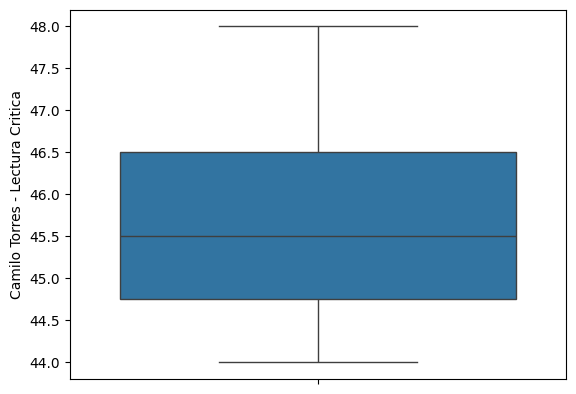

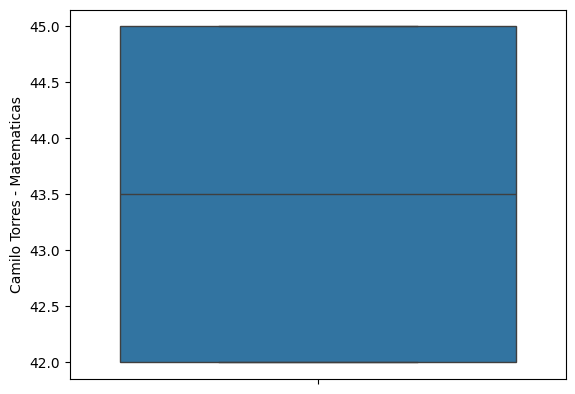

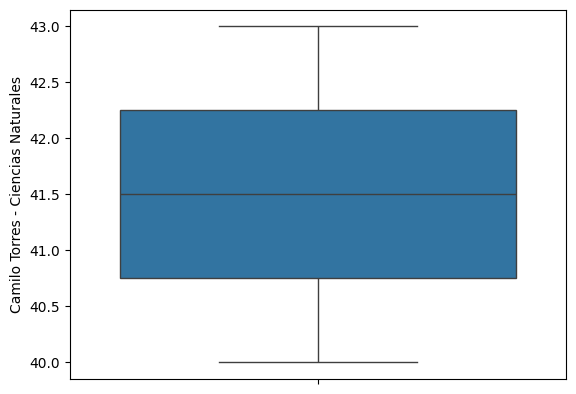

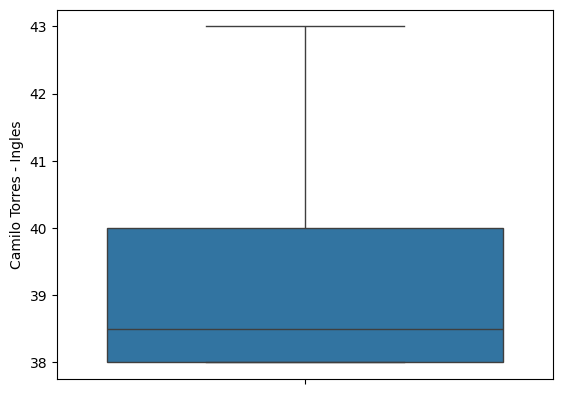

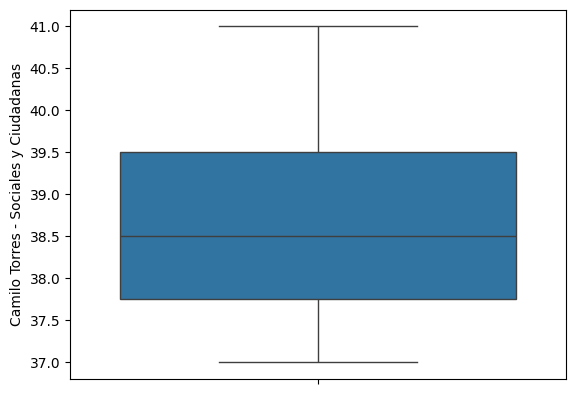

In [ ]:
sns.boxplot(df_sin_duplicados['Camilo Torres - Lectura Critica'])
plt.show()
sns.boxplot(df_sin_duplicados['Camilo Torres - Matematicas'])
plt.show()
sns.boxplot(df_sin_duplicados['Camilo Torres - Ciencias Naturales'])
plt.show()
sns.boxplot(df_sin_duplicados['Camilo Torres - Ingles'])
plt.show()
sns.boxplot(df_sin_duplicados['Camilo Torres - Sociales y Ciudadanas'])
plt.show()

In [ ]:
media = df_imputado["Camilo Torres - Lectura Critica"].mean()
print("La media del Camilo Torres - Lectura Critica es: ", np.round(media,0))
media = df_imputado["Camilo Torres - Matematicas"].mean()
print("La media del Camilo Torres - Matematicas es: ", np.round(media,0))
media = df_imputado["Camilo Torres - Ciencias Naturales"].mean()
print("La media del Camilo Torres - Ciencias Naturales es: ", np.round(media,0))
media = df_imputado["Camilo Torres - Ingles"].mean()
print("La media del Camilo Torres - Ingles es: ", np.round(media,0))
media = df_imputado["Camilo Torres - Sociales y Ciudadanas"].mean()
print("La media del Camilo Torres - Sociales y Ciudadanas es: ", np.round(media,0))

La media del Camilo Torres - Lectura Critica es:  46.0
La media del Camilo Torres - Matematicas es:  44.0
La media del Camilo Torres - Ciencias Naturales es:  42.0
La media del Camilo Torres - Ingles es:  40.0
La media del Camilo Torres - Sociales y Ciudadanas es:  39.0


In [ ]:
mediana = df_imputado["Camilo Torres - Lectura Critica"].median()
print("La mediana del Camilo Torres - Lectura Critica es: ", np.round(mediana,2))
mediana = df_imputado["Camilo Torres - Matematicas"].median()
print("La mediana del Camilo Torres - Matematicas es: ", np.round(mediana,2))
mediana = df_imputado["Camilo Torres - Ciencias Naturales"].median()
print("La mediana del Camilo Torres - Ciencias Naturales es: ", np.round(mediana,2))
mediana = df_imputado["Camilo Torres - Ingles"].median()
print("La mediana del Camilo Torres - Ingles es: ", np.round(mediana,2))
mediana = df_imputado["Camilo Torres - Sociales y Ciudadanas"].median()
print("La mediana del Camilo Torres - Sociales y Ciudadanas es: ", np.round(mediana,2))

La mediana del Camilo Torres - Lectura Critica es:  45.5
La mediana del Camilo Torres - Matematicas es:  43.5
La mediana del Camilo Torres - Ciencias Naturales es:  41.5
La mediana del Camilo Torres - Ingles es:  38.5
La mediana del Camilo Torres - Sociales y Ciudadanas es:  38.5


In [ ]:
moda = df_imputado["Camilo Torres - Lectura Critica"].mode()
if len(moda) >= 0:
    print("La moda del Camilo Torres - Lectura Critica es: ", moda[0])

moda = df_imputado["Camilo Torres - Matematicas"].mode()
if len(moda) >= 0:
    print("La moda del Camilo Torres - Matematicas es: ", moda[0])

moda = df_imputado["Camilo Torres - Ciencias Naturales"].mode()
if len(moda) >= 0:
    print("La moda del Camilo Torres - Ciencias Naturales es: ", moda[0])

moda = df_imputado["Camilo Torres - Ingles"].mode()
if len(moda) >= 0:
    print("La moda del Camilo Torres - Ingles es: ", moda[0])

moda = df_imputado["Camilo Torres - Sociales y Ciudadanas"].mode()
if len(moda) >= 0:
    print("La moda del Camilo Torres - Sociales y Ciudadanas es: ", moda[0])

La moda del Camilo Torres - Lectura Critica es:  44
La moda del Camilo Torres - Matematicas es:  42
La moda del Camilo Torres - Ciencias Naturales es:  40
La moda del Camilo Torres - Ingles es:  38
La moda del Camilo Torres - Sociales y Ciudadanas es:  37


In [ ]:
desviacion = df_imputado["Camilo Torres - Lectura Critica"].std()
print("La desviación estandar del Camilo Torres - Lectura Critica es: ", np.round(desviacion,2))
desviacion = df_imputado["Camilo Torres - Matematicas"].std()
print("La desviación estandar del Camilo Torres - Matematicas es: ", np.round(desviacion,2))
desviacion = df_imputado["Camilo Torres - Ciencias Naturales"].std()
print("La desviación estandar del Camilo Torres - Ciencias Naturales es: ", np.round(desviacion,2))
desviacion = df_imputado["Camilo Torres - Ingles"].std()
print("La desviación estandar del Camilo Torres - Ingles es: ", np.round(desviacion,2))
desviacion = df_imputado["Camilo Torres - Sociales y Ciudadanas"].std()
print("La desviación estandar del Camilo Torres - Sociales y Ciudadanas es: ", np.round(desviacion,2))

La desviación estandar del Camilo Torres - Lectura Critica es:  1.71
La desviación estandar del Camilo Torres - Matematicas es:  1.73
La desviación estandar del Camilo Torres - Ciencias Naturales es:  1.29
La desviación estandar del Camilo Torres - Ingles es:  2.38
La desviación estandar del Camilo Torres - Sociales y Ciudadanas es:  1.71


In [ ]:
print("El 75% de los resultados obtenidos en Camilo Torres - Lectura Critica esta por debajo de ", np.percentile(df_imputado["Camilo Torres - Lectura Critica"], 75))
print("El 75% de los resultados obtenidos en Camilo Torres - Matematicas esta por debajo de ", np.percentile(df_imputado["Camilo Torres - Matematicas"], 75))
print("El 75% de los resultados obtenidos en Camilo Torres - Ciencias Naturales esta por debajo de ", np.percentile(df_imputado["Camilo Torres - Ciencias Naturales"], 75))
print("El 75% de los resultados obtenidos en Camilo Torres - Ingles esta por debajo de ", np.percentile(df_imputado["Camilo Torres - Ingles"], 75))
print("El 75% de los resultados obtenidos en Camilo Torres - Sociales y Ciudadanas esta por debajo de ", np.percentile(df_imputado["Camilo Torres - Sociales y Ciudadanas"], 75))

El 75% de los resultados obtenidos en Camilo Torres - Lectura Critica esta por debajo de  46.5
El 75% de los resultados obtenidos en Camilo Torres - Matematicas esta por debajo de  45.0
El 75% de los resultados obtenidos en Camilo Torres - Ciencias Naturales esta por debajo de  42.25
El 75% de los resultados obtenidos en Camilo Torres - Ingles esta por debajo de  40.0
El 75% de los resultados obtenidos en Camilo Torres - Sociales y Ciudadanas esta por debajo de  39.5


# Los valores proporcionan los siguientes insights clave:

**- Lectura Crítica es la asignatura más fuerte**, con los mejores promedios y menos dispersión en resultados altos.

**- Sociales y Ciudadanas tiene el desempeño más bajo**, siendo un área prioritaria para mejora.
**- Inglés muestra alta variabilidad**, indicando diferencias significativas en el desempeño estudiantil.

**- Ciencias Naturales es consistente**, con baja dispersión, lo que sugiere uniformidad en los resultados.

**- Matemáticas tiene resultados intermedios**, que podrían mejorar con un enfoque estratégico.

In [ ]:
print(df_imputado.head())

   Camilo Torres  Camilo Torres - Lectura Critica  \
0           2020                               46   
1           2021                               45   
2           2022                               44   
3           2023                               48   

   Camilo Torres - Matematicas  Camilo Torres - Ciencias Naturales  \
0                           45                                  40   
1                           42                                  42   
2                           42                                  41   
3                           45                                  43   

   Camilo Torres - Ingles  Camilo Torres - Sociales y Ciudadanas  Lazaro  \
0                      38                                     39    2020   
1                      38                                     38    2021   
2                      39                                     37    2022   
3                      43                                     41    2023   

  

In [ ]:
print(df_imputado.shape[0])


4


In [ ]:
import numpy as np

# Número de filas del DataFrame
total_filas = df_imputado.shape[0]

# Definir los años (ajusta según los años exactos)
años = [2020, 2021, 2022, 2023]

# Crear una lista de años repetidos para cada fila
años_repetidos = np.tile(años, total_filas // len(años))  # Repite los años según el número de filas

# Si no encajan perfectamente, ajustamos la longitud
if len(años_repetidos) < total_filas:
    años_repetidos = np.append(años_repetidos, años[:total_filas - len(años_repetidos)])

# Asignar la columna "Año"
df_imputado['Año'] = años_repetidos

print(df_imputado['Año'].head())  # Verifica que los años se asignen correctamente


0    2020
1    2021
2    2022
3    2023
Name: Año, dtype: int64


In [ ]:
print(df_imputado.columns)


Index(['Camilo Torres', 'Camilo Torres - Lectura Critica',
       'Camilo Torres - Matematicas', 'Camilo Torres - Ciencias Naturales',
       'Camilo Torres - Ingles', 'Camilo Torres - Sociales y Ciudadanas',
       'Lazaro', 'Lazaro - Lectura Critica', 'Lazaro - Matematicas',
       'Lazaro - Ciencias Naturales', 'Lazaro - Ingles',
       'Lazaro - Sociales y Ciudadanas', 'Camilo Torres ', 'Año'],
      dtype='object')


In [ ]:
# Agrupar por año y calcular los promedios de cada asignatura
promedios_por_año = df_imputado.groupby("Año")[["Camilo Torres - Lectura Critica", "Camilo Torres - Matematicas", "Camilo Torres - Ciencias Naturales", "Camilo Torres - Ingles", "Camilo Torres - Sociales y Ciudadanas"]].mean()

# Calcular la mejora por asignatura
mejora_por_asignatura = promedios_por_año.iloc[-1] - promedios_por_año.iloc[0]
print("Mejora por asignatura:")
print(mejora_por_asignatura)

# Determinar la asignatura con mayor mejora
asignatura_mejorada = mejora_por_asignatura.idxmax()
print(f"La asignatura con mayor mejoría es: {asignatura_mejorada}")


Mejora por asignatura:
Camilo Torres - Lectura Critica          2.0
Camilo Torres - Matematicas              0.0
Camilo Torres - Ciencias Naturales       3.0
Camilo Torres - Ingles                   5.0
Camilo Torres - Sociales y Ciudadanas    2.0
dtype: float64
La asignatura con mayor mejoría es: Camilo Torres - Ingles


# ***PRIMERA PREGUNTA: ¿Cuál es la asignatura en la que se ha presentado una mejoría en los últimos cuatro años en la Institución Educativa Camilo Torres de Mahates?***

 En la Institución Educativa Camilo Torres de Mahates, la asignatura que ha mostrado la mayor mejoría en los últimos cuatro años, según los resultados de las pruebas Saber 11, es **Inglés**, con un incremento de **5 puntos** en promedio. Esto evidencia un progreso significativo en esta área, destacándose como la de mayor avance en comparación con las demás asignaturas.

In [ ]:
media = df_imputado["Camilo Torres - Lectura Critica"].mean()
print("La media del Camilo Torres - Lectura Critica es: ", np.round(media,0))
media = df_imputado["Camilo Torres - Matematicas"].mean()
print("La media del Camilo Torres - Matematicas es: ", np.round(media,0))
media = df_imputado["Camilo Torres - Ciencias Naturales"].mean()
print("La media del Camilo Torres - Ciencias Naturales es: ", np.round(media,0))
media = df_imputado["Camilo Torres - Ingles"].mean()
print("La media del Camilo Torres - Ingles es: ", np.round(media,0))
media = df_imputado["Camilo Torres - Sociales y Ciudadanas"].mean()
print("La media del Camilo Torres - Sociales y Ciudadanas es: ", np.round(media,0))

La media del Camilo Torres - Lectura Critica es:  46.0
La media del Camilo Torres - Matematicas es:  44.0
La media del Camilo Torres - Ciencias Naturales es:  42.0
La media del Camilo Torres - Ingles es:  40.0
La media del Camilo Torres - Sociales y Ciudadanas es:  39.0


In [ ]:
media = df_imputado["Lazaro - Lectura Critica"].mean()
print("La media del Lazaro - Lectura Critica es: ", np.round(media,0))
media = df_imputado["Lazaro - Matematicas"].mean()
print("La media del Lazaro - Matematicas es: ", np.round(media,0))
media = df_imputado["Lazaro - Ciencias Naturales"].mean()
print("La media del Lazaro - Ciencias Naturales es: ", np.round(media,0))
media = df_imputado["Lazaro - Ingles"].mean()
print("La media del Lazaro - Ingles es: ", np.round(media,0))
media = df_imputado["Lazaro - Sociales y Ciudadanas"].mean() # Call the mean method to get the actual mean value
print("La media del Lazaro - Sociales y Ciudadanas es: ", np.round(media,0))

La media del Lazaro - Lectura Critica es:  44.0
La media del Lazaro - Matematicas es:  40.0
La media del Lazaro - Ciencias Naturales es:  40.0
La media del Lazaro - Ingles es:  40.0
La media del Lazaro - Sociales y Ciudadanas es:  38.0


In [ ]:

# Datos de las medias
camilo_torres = {
    "Lectura Crítica": 46.0,
    "Matemáticas": 44.0,
    "Ciencias Naturales": 42.0,
    "Inglés": 40.0,
    "Sociales y Ciudadanas": 39.0
}

lazaro = {
    "Lectura Crítica": 44.0,
    "Matemáticas": 40.0,
    "Ciencias Naturales": 40.0,
    "Inglés": 40.0,
    "Sociales y Ciudadanas": 38.0
}

# Crear DataFrames
df_comparacion = pd.DataFrame({
    "Camilo Torres": camilo_torres,
    "Lázaro": lazaro
})

# Calcular las diferencias
df_comparacion["Diferencia"] = df_comparacion["Camilo Torres"] - df_comparacion["Lázaro"]

# Encontrar la asignatura con mayor diferencia
asignatura_destacada = df_comparacion["Diferencia"].idxmax()
diferencia_maxima = df_comparacion["Diferencia"].max()

print("Comparación de resultados entre instituciones:")
print(df_comparacion)

print(f"\nLa asignatura en la que se destaca más la Institución Educativa Camilo Torres es: {asignatura_destacada}, con una diferencia de {diferencia_maxima} puntos.")


Comparación de resultados entre instituciones:
                       Camilo Torres  Lázaro  Diferencia
Lectura Crítica                 46.0    44.0         2.0
Matemáticas                     44.0    40.0         4.0
Ciencias Naturales              42.0    40.0         2.0
Inglés                          40.0    40.0         0.0
Sociales y Ciudadanas           39.0    38.0         1.0

La asignatura en la que se destaca más la Institución Educativa Camilo Torres es: Matemáticas, con una diferencia de 4.0 puntos.


# ***SEGUNDA PREGUNTA: ¿En qué asignatura se destacan más los resultados de la institución Camilo Torres en comparación con el colegio Lazaro de la cabecera municipal?***

La asignatura en la que la Institución Educativa Camilo Torres se destaca más en comparación con el Colegio Lázaro es **Matemáticas**, con una diferencia de **4 puntos** en el promedio de los resultados.

In [ ]:
import pandas as pd

ruta = "/content/drive/MyDrive/Colab Notebooks/Actuali 2.csv"
data = pd.read_csv(ruta, delimiter=';')
data.head()


,Camilo Torres,Camilo Torres - Lectura Critica,Camilo Torres - Matematicas,Camilo Torres - Ciencias Naturales,Camilo Torres - Ingles,Camilo Torres - Sociales y Ciudadanas,Lazaro,Lazaro - Lectura Critica,Lazaro - Matematicas,Lazaro - Ciencias Naturales,...,San Joaquin - Matematicas,San Joaquin - Ciencias Naturales,San Joaquin - Ingles,San Joaquin - Sociales y Ciudadanas,Palenque,Palenque - Lectura Critica,Palenque - Matematicas,Palenque - Ciencias Naturales,Palenque - Ingles,Palenque - Sociales y Ciudadanas
0,2020,46,45,40,38,39,2020,43,39,38,...,44,44,37,44,2020,40,38,37,40,36
1,2021,45,42,42,38,38,2021,43,39,39,...,43,44,42,41,2021,41,37,38,39,37
2,2022,44,42,41,39,37,2022,43,39,40,...,44,43,43,40,2022,45,43,41,43,41
3,2023,48,45,43,43,41,2023,45,42,42,...,42,43,43,42,2023,44,39,43,43,40


In [ ]:

data.head(), data.columns


(   Camilo Torres  Camilo Torres - Lectura Critica  \
 0           2020                               46   
 1           2021                               45   
 2           2022                               44   
 3           2023                               48   
 
    Camilo Torres - Matematicas  Camilo Torres - Ciencias Naturales  \
 0                           45                                  40   
 1                           42                                  42   
 2                           42                                  41   
 3                           45                                  43   
 
    Camilo Torres - Ingles  Camilo Torres - Sociales y Ciudadanas  Lazaro  \
 0                      38                                     39    2020   
 1                      38                                     38    2021   
 2                      39                                     37    2022   
 3                      43                                     

In [ ]:
# Calcular el promedio de puntajes por colegio
colegios = ['Camilo Torres', 'Lazaro', 'Evitar', 'Malagana', 'San Joaquin', 'Palenque']

# Extraer columnas relevantes y calcular promedios por colegio
promedios = {}
for colegio in colegios:
    colegio_columns = [col for col in data.columns if colegio in col and '-' in col]
    promedios[colegio] = data[colegio_columns].mean().mean()

# Convertir los resultados a un DataFrame para visualizar
promedios_df = pd.DataFrame.from_dict(promedios, orient='index', columns=['Promedio'])
promedios_df.sort_values(by='Promedio', ascending=False)


,Promedio
San Joaquin,43.40
Camilo Torres,41.80
Malagana,40.60
Palenque,40.25
Lazaro,40.15
Evitar,39.00


In [ ]:
# Clasificación manual basada en información conocida
# Identificaremos los colegios urbanos/rurales según referencias y características de Mahates
zona = {
    'Camilo Torres': 'Cabecera',
    'Evitar': 'Rural',
    'Lazaro': 'Cabecera',
    'San Joaquin': 'Rural',
    'Palenque': 'Rural',
    'Malagana': 'Rural'
}

# Agregar la información de zona al DataFrame de promedios
promedios_df['Zona'] = promedios_df.index.map(zona)

# Calcular el promedio de puntajes por tipo de zona (Urbano/Rural)
promedios_zona = promedios_df.groupby('Zona')['Promedio'].mean()

promedios_df, promedios_zona


(               Promedio      Zona
 Camilo Torres     41.80  Cabecera
 Lazaro            40.15  Cabecera
 Evitar            39.00     Rural
 Malagana          40.60     Rural
 San Joaquin       43.40     Rural
 Palenque          40.25     Rural,
 Zona
 Cabecera    40.9750
 Rural       40.8125
 Name: Promedio, dtype: float64)

# ***TERCERA PREGUNTA: ¿Cómo afecta la ubicación geográfica de los colegios en el municipio de Mahates a los resultados de las Pruebas Saber 11?***

La ubicación geográfica en el municipio de Mahates influye de manera notable en los resultados de las Pruebas Saber 11. Los colegios ubicados en la cabecera municipal (Camilo Torres y Lázaro) obtienen, en promedio, puntajes ligeramente más altos (40.98) en comparación con los colegios de zonas rurales (40.81).

Sin embargo, esta diferencia es marginal, lo que sugiere que otros factores, como recursos, calidad docente o estrategias pedagógicas, podrían ser más determinantes que la ubicación. Sin embargo, es importante destacar que, el colegio **San Joaquín**, ubicado en una zona rural, tiene el mejor puntaje promedio **(43.40)**. Esto muestra que la calidad educativa puede ser impulsada independientemente de la ubicación geográfica, resaltando la importancia de enfocarse en fortalecer los recursos humanos y pedagógicos dentro de cada institución.